# **Projet pluridisciplinaire**

## **Sujet**  
Déterminer quels sont les effets d'un régime (hyper gras ou légère restriction calorique) sur les fonctions comportementales au cours du vieillissement chez la souris ?

---

## **Table des matières**
* [Documentation](#0)
* [1) Exploration des données](#1)
    * [1.1) Lisibilité des données](#1_1)
    * [1.2) Existence de duplicatat](#1_2)
    * [1.3) Recherche des outliers](#1_3)

* [2) Nettoyage des données](#2)
    * [2.1) Gestion des outliers](#2_1)

* [3) Matrice de corrélation](#3)
* [4) Anova : X et Y](#4)
    * [4.1) Shapiro-Wilk : vérification de la condition de normalité ](#4_1)
    * [4.2) Levene : vérification de la condition sur l'homogénéité des variances](#4_2)
    * [4.3) ANOVA](#4_3)
    * [4.3) Test Post-hoc (Tukey's)](#4_4)





* [3) Fonction motrice : Rotarod et Test d'aggripement](#3)
    * [3.1) Rotarod](#3_1)
    * [3.2) Test d'aggripement](#3_2)

* [4) Fonction anxiété : Openfield et Labyrinthe en croix surélevé](#4)
    * [4.2) Openfield](#4_1)
    * [4.2) Labyrinthe en croix surélevé](#4_2)

* [5) Fonction mémoire : Openfield et Labyrinthe en croix surélevé](#4)
    * [4.2) Openfield](#4_1)
    * [4.2) Labyrinthe en croix surélevé](#4_2)

* [6) Fonction olfactive : Openfield et Labyrinthe en croix surélevé](#4)
    * [4.2) Openfield](#4_1)
    * [4.2) Labyrinthe en croix surélevé](#4_2)

* [7) Fonction olfactive](#7)

* [5 ) Conclusion aux 3 questions](#5)


## Documentation <a class="anchor" id="1"></a>
---
**Variables :**

* **id** : (ID) Numéro d'identification des souris
* **group**	: (Traitement) Type de régime alimentaire donné aux souris
* **age_bf** : (age avant le traitement) j
* **age_af** : (age a la fin du traitement) j+3 mois
* **weight_bf**	: (poids avant le traitement)
* **weight_af**	: (poids a la fin du traitement)
* **rotarod_time_tot** : (temps total du test en sec) Temps maximal du test 'rotarod'
* **rotarod_time_rec** : (temps sur le rotarod en sec) Temps pour un sujet au test 'rotarod'
* **gripTest_strenght**	: (Force motrice en newton) 
* **openField_distance** : (distance parcourue en cm) Distance que la souris a parcouru en totalité (centre et périphérie)
* **openField_time_tot** : (temps passé au centre en sec) 
* **openField_middle_time** : (temps passé en périphérie en sec)
* **openField_periphery_time** : (temps total du test en sec.1)
* **maze_time_tot**	: (Temps total du test en sec) Temps maximal du test 'maze'
* **mazeTest_time_open** : (temps bras ouvert) Temps passé dans la partie ouverte de la structure
* **mazeTest_time_close** : (temps bras fermé) Temps passé dans la partie fermée de la structure
* **barnes_nb_error** : (Nombre d'erreur pour le test mémoire) 
* **yMaze_pct_alternance** : (% d'alternance) Pourcentage d'alternance entre les différentes parties de la structure du test 'ymaze'
* **olfaction_habituation_time** : (Phase Habituation: temps pour trouver le cookie non caché (sec)) 
* **olfaction_test_time** : (Phase test: temps pour trouver le cookie caché dans la cage (sec))
* **hippocampus_size** : (hippocampal volume (mm3)) Taille de l'hippocampe des souris

**Type de test :**
* **Fonctions motrices** : 
    * Rotarod 
    * Test d'aggripement 
* **Fonctions anxiété** :
    * Openfield 
    * Labyrinthe en croix surélevé
* **Fonction mémoire** :
    * Labyrinthe de Barnes
* **Olfaction** :
    * Food buried test
* **Volume de l'hippocampe**
    * IRM

---

Fait sur Python 3.12.2.


## 1) Exploration des données <a class="anchor" id="1"></a>
---

In [2]:
# !python3.12 -m pip install pandas matplotlib numpy ipywidgets jupyter xlrd

In [45]:
# Importation 
import pandas as pd # Mise en forme des données
import matplotlib.pyplot as plt # Affichages
import numpy as np # Type et matrices
import seaborn as sns # Affichage graphique
import ipywidgets as widgets
import statsmodels.api as sm
from IPython.display import display
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from scipy.stats import shapiro
from scipy.stats import levene

In [4]:
df_total = pd.read_excel('ProjetInterdisciplinaire_datas_2024 (1).xls', skiprows=1)
df_total.head(10)

,ID,Traitement,age avant le traitement,age a la fin du traitement,poids avant le traitement,poids a la fin du traitement,temps total du test en sec,temps sur le rotarod en sec,Force motrice en newton,distance parcourue en cm,...,temps passé au centre en sec,temps passé en périphérie en sec,Temps total du test en sec,temps bras ouvert,temps bras fermé,Nombre d'erreur pour le test mémoire,% d'alternance,Phase Habituation: temps pour trouver le cookie non caché (sec),Phase test: temps pour trouver le cookie caché dans la cage (sec),hippocampal volume (mm3)
0,1,jeune,3,6,25,25,300,192.0,150,4500.0,...,80.00,520.00,400,150.0,250.0,3.00,85.0,10.0,90,20.0
1,2,jeune,3,6,26,27,300,177.0,160,4500.0,...,100.00,500.00,400,160.0,240.0,2.50,80.0,12.0,85,22.0
2,3,jeune,3,6,24,25,300,210.0,140,4800.0,...,120.00,480.00,400,130.0,270.0,2.75,79.0,8.0,95,19.7
3,4,jeune,3,6,25,26,300,155.0,90,4000.0,...,110.00,490.00,400,110.0,290.0,2.00,75.0,9.0,90,19.0
4,5,jeune,3,6,28,27,300,160.0,170,4235.0,...,130.00,470.00,400,145.0,255.0,1.80,88.0,10.0,98,21.0
5,6,jeune,3,6,29,30,300,150.0,125,4100.0,...,200.00,400.00,400,135.0,265.0,2.00,85.0,11.0,80,20.0
6,7,Ages,12,15,33,35,300,92.0,85,4500.0,...,48.48,551.60,400,90.0,310.0,7.25,50.0,15.0,150,17.0
7,8,Ages,12,15,32,32,300,NaN,80,4600.0,...,86.72,513.36,400,75.0,325.0,9.00,65.0,10.0,143,18.0
8,9,Ages,12,15,28,31,300,120.0,75,4445.0,...,48.56,551.52,400,65.0,335.0,8.00,55.6,7.0,132,17.0
9,10,Ages,12,15,32,34,300,100.0,60,4700.0,...,35.44,564.64,400,70.0,330.0,7.00,58.3,13.0,127,16.0


In [5]:
df_total.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 21 columns):
 #   Column                                                             Non-Null Count  Dtype  
---  ------                                                             --------------  -----  
 0   ID                                                                 42 non-null     int64  
 1   Traitement                                                         42 non-null     object 
 2   age avant le traitement                                            42 non-null     int64  
 3   age a la fin du traitement                                         42 non-null     int64  
 4   poids avant le traitement                                          42 non-null     int64  
 5   poids a la fin du traitement                                       42 non-null     int64  
 6   temps total du test en sec                                         42 non-null     int64  
 7   temps sur le rotarod en sec 

In [6]:
df_total.describe()

,ID,age avant le traitement,age a la fin du traitement,poids avant le traitement,poids a la fin du traitement,temps total du test en sec,temps sur le rotarod en sec,Force motrice en newton,distance parcourue en cm,temps total du test en sec.1,temps passé au centre en sec,temps passé en périphérie en sec,Temps total du test en sec,temps bras ouvert,temps bras fermé,Nombre d'erreur pour le test mémoire,% d'alternance,Phase Habituation: temps pour trouver le cookie non caché (sec),Phase test: temps pour trouver le cookie caché dans la cage (sec),hippocampal volume (mm3)
count,42.000000,42.000000,42.000000,42.000000,42.000000,42.0,41.000000,42.000000,42.000000,42.0,42.000000,42.000000,42.0,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000
mean,21.500000,10.714286,13.714286,31.809524,35.119048,300.0,117.024390,90.285714,4332.283759,600.0,59.857143,540.177143,400.0,71.178571,328.821429,8.103571,61.028571,11.416667,142.333333,16.833333
std,12.267844,3.187519,3.187519,2.948651,11.947451,0.0,74.043395,33.947798,1477.566259,0.0,38.615467,38.615661,0.0,43.060624,43.060624,5.820207,14.843645,2.488796,55.251384,3.712843
min,1.000000,3.000000,6.000000,24.000000,20.000000,300.0,2.000000,40.000000,2300.000000,600.0,9.000000,400.000000,400.0,2.000000,240.000000,0.000000,30.000000,7.000000,80.000000,7.000000
25%,11.250000,12.000000,15.000000,31.000000,25.250000,300.0,51.000000,60.000000,2825.000000,600.0,30.520000,517.480000,400.0,28.500000,308.000000,4.312500,50.725000,10.000000,94.250000,14.900000
50%,21.500000,12.000000,15.000000,33.000000,33.500000,300.0,112.000000,82.500000,4175.156496,600.0,57.000000,543.000000,400.0,78.000000,322.000000,6.900000,61.250000,11.000000,128.500000,18.000000
75%,31.750000,12.000000,15.000000,34.000000,40.750000,300.0,175.000000,113.750000,5386.706395,600.0,82.580000,569.500000,400.0,92.000000,371.500000,9.750000,70.375000,13.750000,196.000000,19.425000
max,42.000000,12.000000,15.000000,35.000000,60.000000,300.0,300.000000,170.000000,7000.000000,600.0,200.000000,591.000000,400.0,160.000000,398.000000,25.000000,88.000000,16.000000,250.000000,22.000000


**1.1 Lisibilité des données**

1. Importation du dataframe sans la première ligne
2. Renommer la deuxième ligne pour avoir le nom du test dans le nom de la variable ainsi qu'un nom plus court
3. Renommer le nom des groupes en un format standard
4. Mettre l'id en tant qu'index du df

In [7]:
rename_dict = {
    'ID': 'id',
    'Traitement': 'group',
    'age avant le traitement': 'age_bf',
    'age a la fin du traitement': 'age_af',
    'poids avant le traitement': 'weight_bf',
    'poids a la fin du traitement': 'weight_af',
    'temps total du test en sec': 'rotarod_time_tot',
    'temps sur le rotarod en sec': 'rotarod_time_rec',
    'Force motrice en newton': 'gripTest_strenght',

    'distance parcourue en cm': 'openField_distance',
    'temps passé au centre en sec': 'openField_middle_time',
    'temps passé en périphérie en sec': 'openField_periphery_time',
    'temps total du test en sec.1': 'openField_time_tot',  # Ajout de "_Dupl" pour éviter la duplication

    'Temps total du test en sec': 'maze_time_tot',  # Ajout de "_Dupl" pour éviter la duplication
    'temps bras ouvert': 'mazeTest_time_open',
    'temps bras fermé': 'mazeTest_time_close',

    'Nombre d\'erreur pour le test mémoire ': 'barnes_nb_error',

    '% d\'alternance': 'yMaze_pct_alternance',

    'Phase Habituation: temps pour trouver le cookie non caché (sec)': 'olfaction_habituation_time',
    'Phase test: temps pour trouver le cookie caché dans la cage (sec)': 'olfaction_test_time',
    'hippocampal volume (mm3)': 'hippocampus_size'
}

# Renommer les colonnes
df_total.rename(columns=rename_dict, inplace=True)

#Renomme les lignes de group
df_total.replace('Ages', 'Ages (Standard)', inplace=True)
df_total.replace('ages en High fat diet', 'Ages (High fat diet)', inplace=True)
df_total.replace('Ages en restriction calorique', 'Ages (Restrictive diet)', inplace=True)

# Remplace l'index de base par la colonne id
df_total.set_index("id", inplace=True)
df_total.sample(10)

,group,age_bf,age_af,weight_bf,weight_af,rotarod_time_tot,rotarod_time_rec,gripTest_strenght,openField_distance,openField_time_tot,openField_middle_time,openField_periphery_time,maze_time_tot,mazeTest_time_open,mazeTest_time_close,barnes_nb_error,yMaze_pct_alternance,olfaction_habituation_time,olfaction_test_time,hippocampus_size
id,,,,,,,,,,,,,,,,,,,,
8,Ages (Standard),12,15,32,32,300,NaN,80,4600.000000,600,86.72,513.36,400,75.0,325.0,9.00,65.0,10.0,143,18.0
40,Ages (High fat diet),12,15,33,58,300,47.0,45,2800.000000,600,15.00,585.00,400,7.0,393.0,15.00,40.0,10.0,235,11.0
13,Ages (Standard),12,15,30,33,300,80.0,78,3571.479464,600,53.68,546.40,400,92.0,308.0,9.00,52.9,8.0,155,15.5
19,Ages (Restrictive diet),12,15,35,28,300,150.0,100,5046.825579,600,71.92,528.16,400,77.0,323.0,4.75,68.0,16.0,100,20.0
28,Ages (Restrictive diet),12,15,31,22,300,155.0,125,6800.000000,600,70.00,530.00,400,90.0,310.0,4.25,69.8,11.0,94,20.0
27,Ages (Restrictive diet),12,15,34,24,300,160.0,99,6400.000000,600,65.00,535.00,400,79.0,321.0,0.00,70.5,10.0,97,19.5
9,Ages (Standard),12,15,28,31,300,120.0,75,4445.000000,600,48.56,551.52,400,65.0,335.0,8.00,55.6,7.0,132,17.0
20,Ages (Restrictive diet),12,15,35,27,300,100.0,95,5734.231607,600,64.48,535.60,400,72.0,328.0,4.25,70.0,11.0,102,19.0
21,Ages (Restrictive diet),12,15,34,26,300,189.0,102,6000.000000,600,21.04,579.04,400,85.0,315.0,5.75,72.0,8.0,90,19.5


**1.2 Existence de duplicatat**

In [8]:
len(df_total[df_total.duplicated()])

0

Il n'existe aucun duplicatat dans cette dataframe.

**1.3 Recherche des outliers**

Nous effectuons la visualisation des données sur les valeurs numériques pertinentes de manière intragroupe, c'est à dire qu'on vérifie qu'il n'y ait pas de souris qui a une donnée aberante sur un test dans son groupe. On exclut donc les colonnes 'group', 'age_bf', 'age_af', 'weight_bf', 'weight_af' et 'hippocampus_size'. Après visualisation, nous préférons ne pas utiliser 'openField_distance' car elle est n'est du même ordre de grandeur.

C:\Users\lonta\AppData\Local\Temp\ipykernel_8860\3230962327.py:20: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axs[nb].boxplot(data[columns_to_include], labels=columns_to_include)
C:\Users\lonta\AppData\Local\Temp\ipykernel_8860\3230962327.py:20: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axs[nb].boxplot(data[columns_to_include], labels=columns_to_include)
C:\Users\lonta\AppData\Local\Temp\ipykernel_8860\3230962327.py:20: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axs[nb].boxplot(data[columns_to_include], labels=columns_to_include)
C:\Users\lonta\AppData\Local\Temp\ipykernel_8860\3230962327.py:20: MatplotlibDe

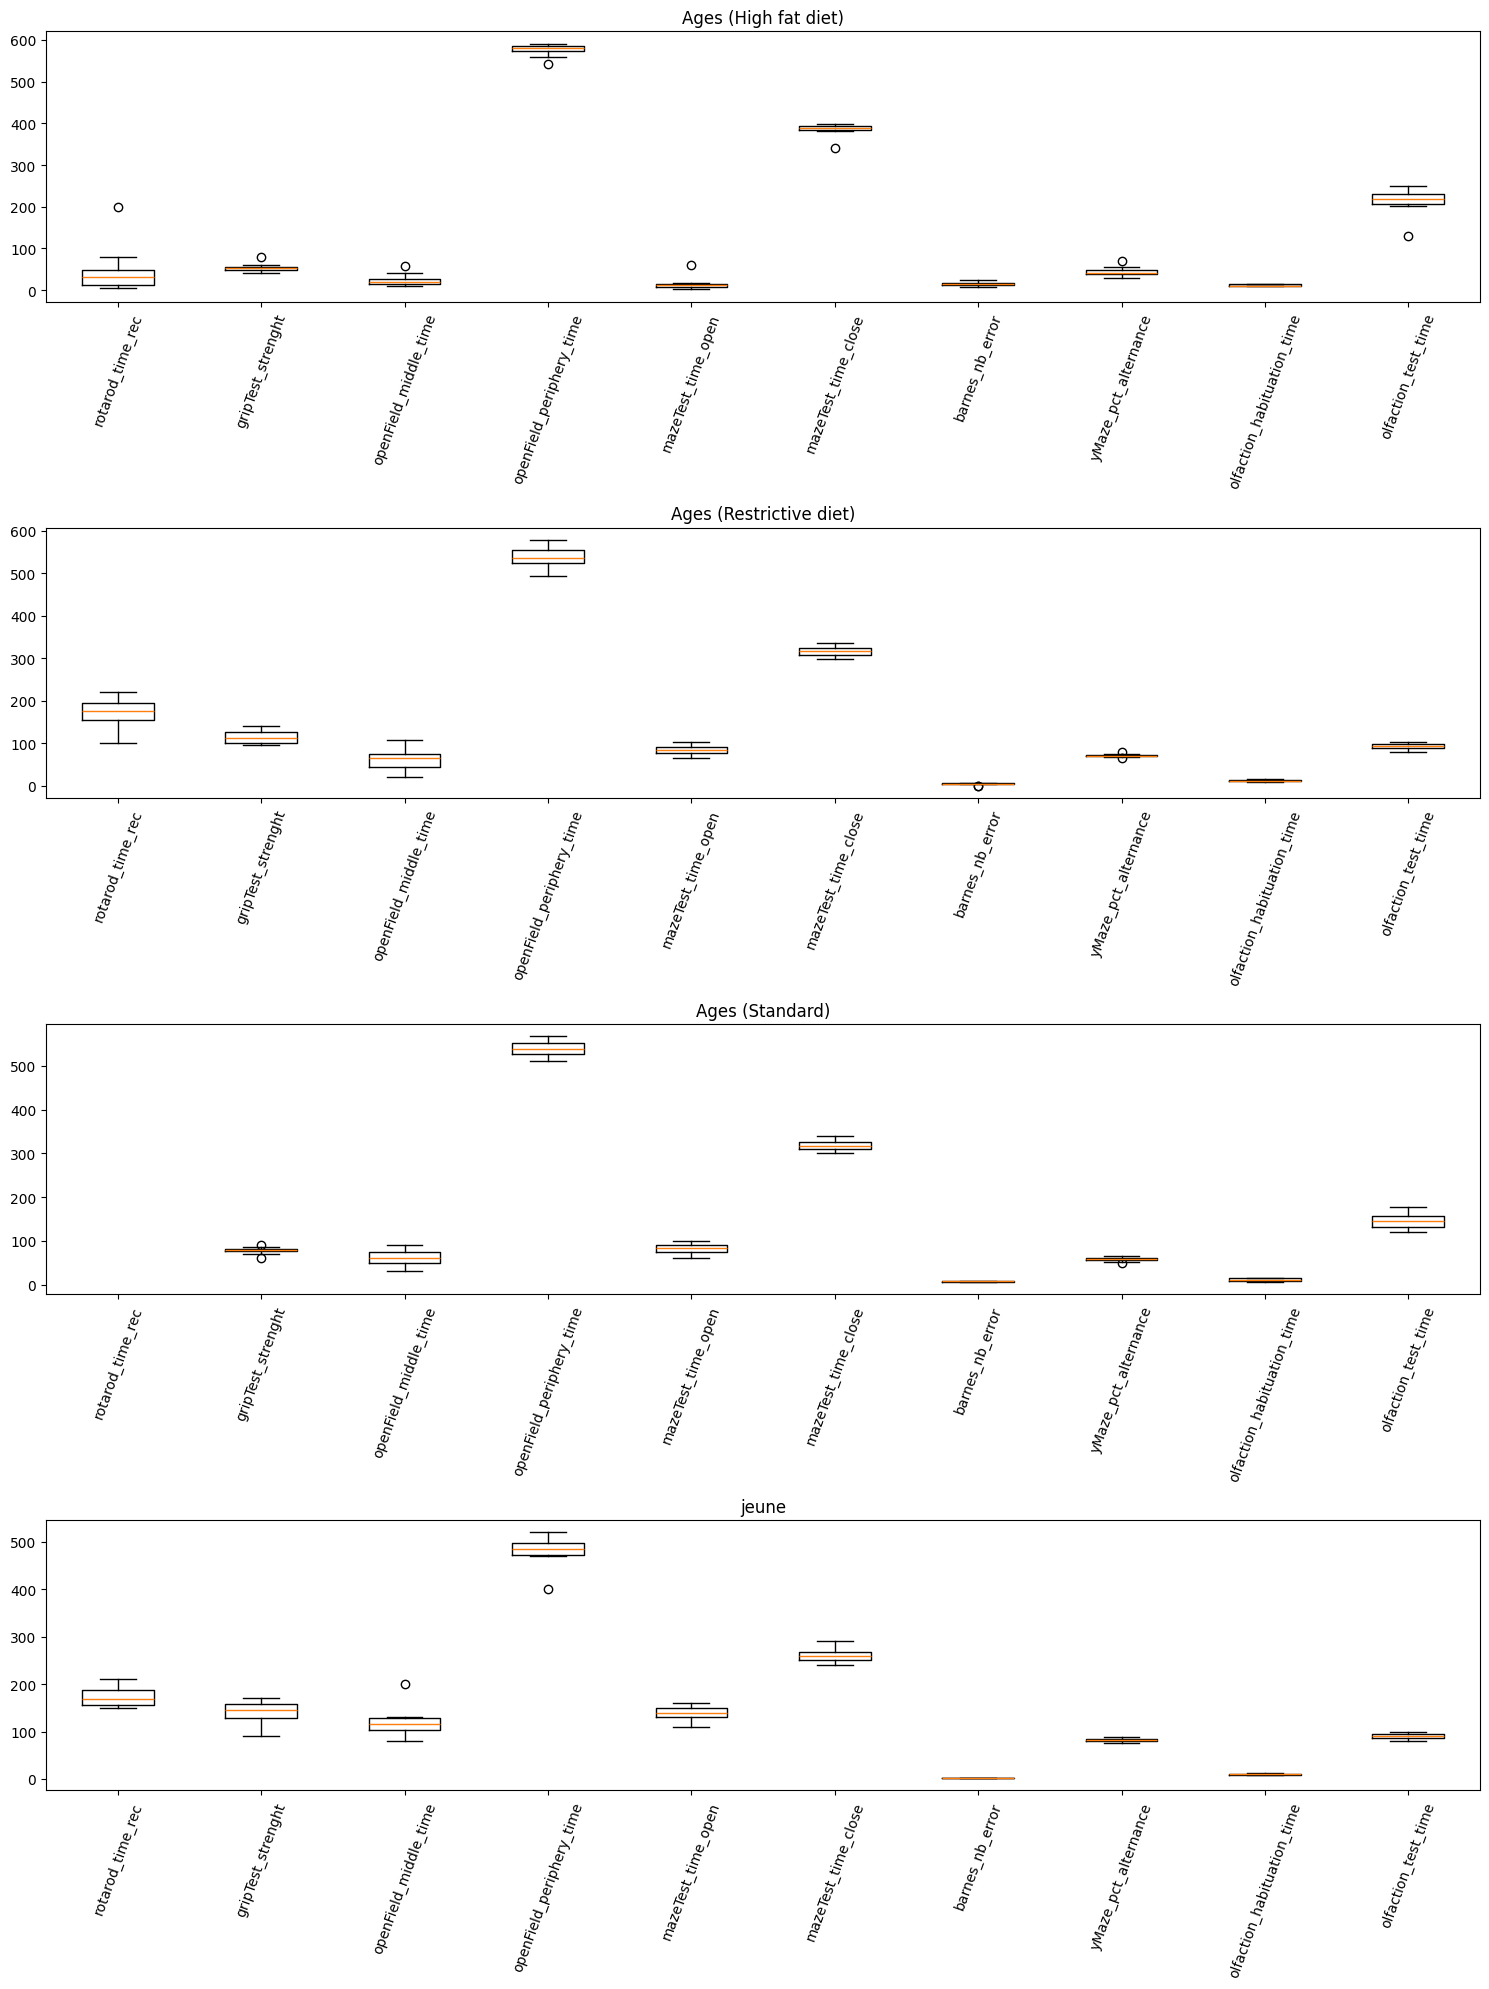

In [9]:
columns_to_include = ['rotarod_time_rec', 
    'gripTest_strenght', 
    # 'openField_distance', 
    'openField_middle_time', 
    'openField_periphery_time', 
    'mazeTest_time_open', 
    'mazeTest_time_close', 
    'barnes_nb_error', 
    'yMaze_pct_alternance', 
    'olfaction_habituation_time', 
    'olfaction_test_time']

# Sélectionnez les colonnes spécifiques
selected_columns = df_total.groupby('group')

fig, axs = plt.subplots(4, 1, figsize=(15,20))
nb = 0 #compteur

for group, data in selected_columns :
    axs[nb].boxplot(data[columns_to_include], labels=columns_to_include)
    axs[nb].set_title(group)
    axs[nb].tick_params(axis='x', rotation=70)
    nb += 1

plt.tight_layout()

In [10]:
# # Fonction pour générer le boxplot
# def plot_boxplot(group_name):
#     fig, ax = plt.subplots(figsize=(15,4))
    
#     group_data = df_total[df_total["group"] == group_name]# Filtrer les données pour le groupe
    
#     columns_to_include = ['rotarod_time_rec', 
#     'gripTest_strenght', 
#     # 'openField_distance', 
#     'openField_middle_time', 
#     'openField_periphery_time', 
#     'mazeTest_time_open', 
#     'mazeTest_time_close', 
#     'barnes_nb_error', 
#     'yMaze_pct_alternance', 
#     'olfaction_habituation_time', 
#     'olfaction_test_time']

#     ax.boxplot(group_data[columns_to_include], labels=columns_to_include)
#     ax.set_title(f"Boxplot pour le groupe : {group_name}")
#     ax.set_ylabel("Valeurs en secondes")
#     ax.tick_params(axis='x', rotation=70)
#     plt.show()

# children = []

# for group in df_total["group"].unique():
#     out = widgets.Output()  # Widget pour afficher du contenu
#     with out:
#         plot_boxplot(group)
#     children.append(out)

# tab = widgets.Tab()
# tab.children = children

# for i, group_name in enumerate(df_total["group"].unique()):
#     tab.set_title(i, group_name)

# display(tab)

**Analyse du graphique :**
Tous les groupes ont des outliers cependant la groupe 'Ages (High fat diet)' en a presque sur toutes ces colonnes et assez écarté des autres. De plus il manque une ou plusieurs valeurs dans la colonne 'rotarod_time_rec' du groupe 'Age (Standard)'. Hormis cela, le dataset semble plutôt propre. On va modéliser le groupe 'Ages (High fat diet)' pour voir les courbes de chaque souris et avoir une idée globale.

## 2) Nettoyage des données
---

**2.1 Gestion des outliers**

# 3) Matrice de corrélation


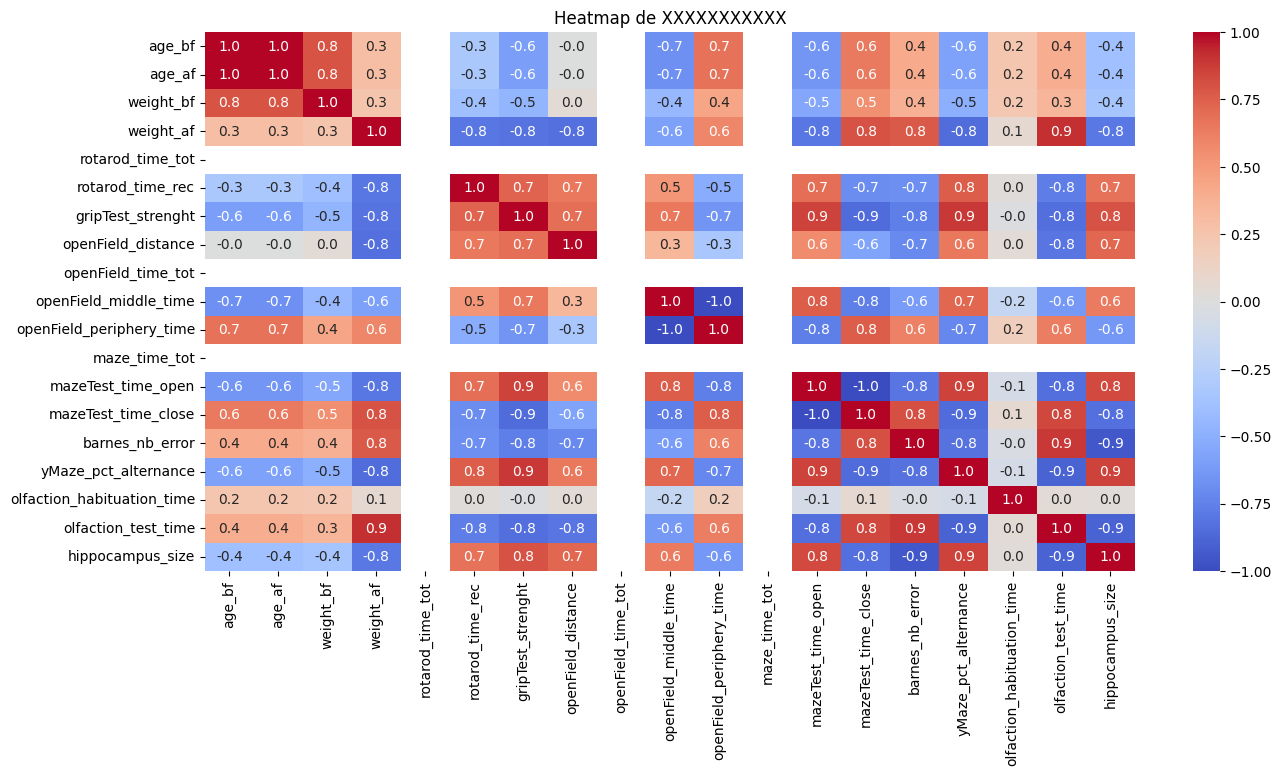

In [37]:
df_total_numeric = df_total._get_numeric_data()
corr = df_total_numeric.corr()

plt.figure(figsize=(15, 7))
sns.heatmap(corr, cmap="coolwarm", annot=True, fmt=".1f", cbar=True)  # Heatmap avec annotations
plt.title("Heatmap de XXXXXXXXXXX")
plt.show()

## 3.1 Anova : XXXXXXXXXXX
Afin de tester si le type de régime alimentaire a un effet sur les fonctions motrices au cours du vieillissement chez la souris, deux tests ont été effectué : le Rotarod et le Griptest.

Ce test permet de tester l'endurance, la coordination motrice et l'équilibre des souris. Lors de ce test, l'animal est placé sur une roue dont la vitesse de rotation augmente au cours du test.

La mesure prise lors de ce test est la moyenne du temps où l'animal est resté sur l'appareil durant 3 essais.

Pour ce test, tout comme pour les autres, les groupes étaient indépendant.
La variable indépendante est : groupe, (jeune, agé, agé en restriction calorique, agé en régime hyper gras), catégoriel.

**Type de variable** :
* **Variable dépendante** : moyenne du temps passé sur le rotarod.

* **Variable contrôle** : groupe jeune, afin de s'assurer qu'il y a un effet du vieillissement.

**Hypothèses** :
* **H0** : Il n'y a pas de différence dans l'endurance, la coordination motrice et l'équilibre entre les groupes soumis à différents régimes alimentaires (standard, HFD, restriction calorique).

* **H1** : Il existe une différence significative dans l'endurance, la coordination motrice et l'équilibre entre les groupes soumis à différents régimes alimentaires.

Afin de déterminer si il est possible d'effectuer une anova pour savoir si il y a une différence dans les moyennes de temps par groupe. La normal dis

### 3.1.2 Shapiro-Wilk : vérification de la condition de normalité

In [46]:
# Effectuer le test de Shapiro-Wilk pour chaque groupe
results_shap = {}
for group, group_data in df_total.groupby("group"):
    stat, p_value = shapiro(group_data["rotarod_time_rec"])
    results_shap[group] = {"F": stat, "p-value": p_value}

# Afficher les résultats
results_shap_df = pd.DataFrame(results_shap).T
print(results_shap_df)

                                F   p-value
Ages (High fat diet)     0.701537  0.000872
Ages (Restrictive diet)  0.957814  0.752223
Ages (Standard)               NaN       NaN
jeune                    0.922052  0.520265


### 3.1.1 Levene : vérification de la condition sur l'homogénéité des variances

In [52]:
# Groupes par traitement
groupes = [df_total[df_total['group'] == t]['rotarod_time_rec'] for t in df_total['group'].unique()]

# Test de Levene
stat, p = levene(*groupes)

print(f"Statistique de Levene : {stat}")
print(f"P-valeur : {p}")

# Interprétation
if p > 0.05:
    print("\nLes variances des groupes sont homogènes (H0 non rejetée).")
else:
    print("\nLes variances des groupes ne sont pas homogènes (H0 rejetée).")

Statistique de Levene : nan
P-valeur : nan

Les variances des groupes ne sont pas homogènes (H0 rejetée).


### ANOVA

In [49]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
model = ols('CHANGER ICI VAR MATRICE ~group', data=df_total).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

SyntaxError: invalid syntax (<unknown>, line 1)

### Test Post Hoc

Ce test permet de savoir quel 

In [44]:
# Test post-hoc Tukey pour significativité entre groupes
tukey = pairwise_tukeyhsd(endog=df_total['rotarod_time_rec'], groups=df_total['group'], alpha=0.05)

# Moyennes par groupe
group_means = df_total.groupby('group')['rotarod_time_rec'].mean()

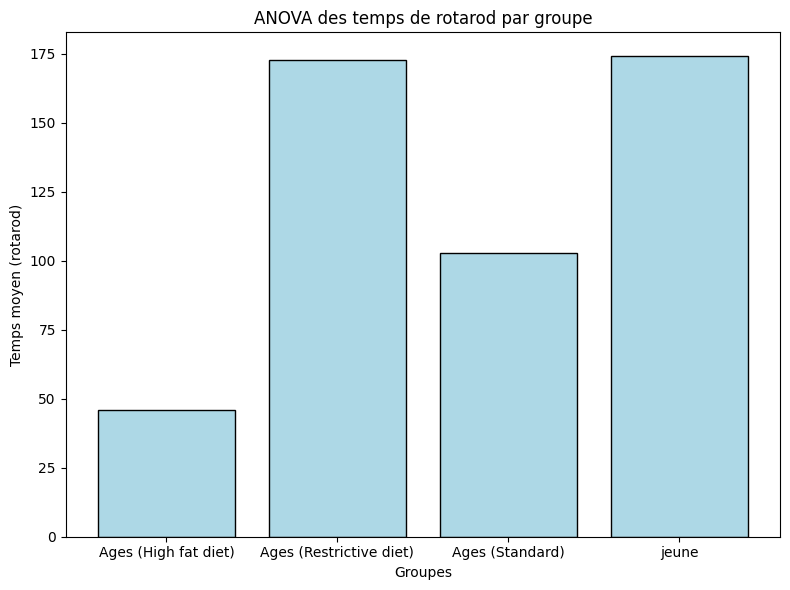

In [ ]:
# # Affichage des moyennes avec significativité trouvé dans l'ANOVA
# fig, ax = plt.subplots(figsize=(8, 6))

# # Bar plot des moyennes
# bars = ax.bar(group_means.index, group_means.values, color='lightblue', edgecolor='black')

# # Ajout des annotations pour significativité
# comparisons = tukey._results_table.data[1:]  # Récupère les résultats post-hoc sans le header
# significant_pairs = [comp for comp in comparisons if comp[4] < 0.05]  # Paires significatives

# # Ajouter les annotations pour les paires significatives
# y_max = max(group_means.values)
# for pair in significant_pairs:
#     group1, group2, _, _, p_value = pair
#     x1, x2 = group_means.index.get_loc(group1), group_means.index.get_loc(group2)
#     y = y_max + 5
#     ax.plot([x1, x1, x2, x2], [y, y + 1, y + 1, y], lw=1.5, color='black')  # Barre de liaison
#     ax.text((x1 + x2) / 2, y + 1, f"p={p_value:.3f}", ha='center', va='bottom', color='black')

# # Personnalisation du graphique
# ax.set_title("ANOVA des temps de rotarod par groupe")
# ax.set_ylabel("Temps moyen (rotarod)")
# ax.set_xlabel("Groupes")
# plt.tight_layout()

# plt.show()

## 3.2 Test d'aggripement


### 3.2.1 Shapiro : vérification de la condition de normalité

### 3.2.2 Shapiro : vérification de la condition de normalité